#### Measure of Central Tendency

##### Mean

In [3]:
import numpy as np

In [4]:
num = np.array([56,32,16,93,63,41,27])

In [5]:
sum(num) / num.size

46.857142857142854

In [6]:
num.mean()

46.857142857142854

##### Median

In [8]:
num

array([56, 32, 16, 93, 63, 41, 27])

In [9]:
sorted(num)

[16, 27, 32, 41, 56, 63, 93]

In [11]:
np.median(num)

41.0

##### Mode

In [14]:
import pandas as pd

In [15]:
s = pd.Series([6,5,4,7,8,3,4,5,4,6,7,4,5,6])

In [16]:
s.mode()

0    4
dtype: int64

In [17]:
s.mode()[0]

4

In [18]:
s.value_counts()

4    4
6    3
5    3
7    2
8    1
3    1
Name: count, dtype: int64

In [19]:
s = pd.Series([6,5,4,7,8,3,4,5,4,6,6,4,5,6])

In [20]:
s.mode()

0    4
1    6
dtype: int64

In [21]:
data = np.array([56,32,16,93,63,41,27,28])

In [22]:
np.mean(data)

44.5

In [24]:
np.median(data)

36.5

In [25]:
data = np.array([56,32,16,93,63,41,27,28,506])

In [26]:
np.mean(data), np.median(data)

(95.77777777777777, 41.0)

##### Normal Distribution

In [28]:
x = np.array([1,2,2,3,3,3,4,4,4,4,5,5,5,5,5,5,6,6,6,6,7,7,7,8,8,9])

In [32]:
np.mean(x), np.median(x), pd.Series(x).mode()[0]

(5.0, 5.0, 5)

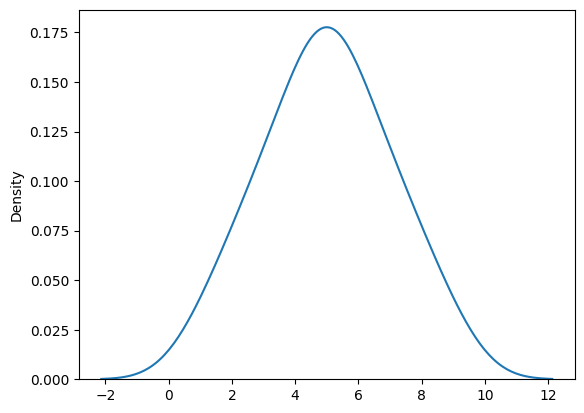

In [33]:
import seaborn as sns
sns.kdeplot(x);

#### Measure of Dispersion

##### Mean Absolute Deviation

In [36]:
num = np.array([23,18,63,49,78,81,33,62])

In [37]:
num - num.mean()

array([-27.875, -32.875,  12.125,  -1.875,  27.125,  30.125, -17.875,
        11.125])

In [38]:
abs(num - num.mean())

array([27.875, 32.875, 12.125,  1.875, 27.125, 30.125, 17.875, 11.125])

In [39]:
np.mean(abs(num - num.mean()))

20.125

##### Variance

In [41]:
np.mean((num - num.mean())**2)

511.859375

##### Standard Deviation

In [43]:
np.sqrt(np.mean((num - num.mean())**2))

22.624309381724782

In [44]:
num.std()

22.624309381724782

In [46]:
pd.Series(num).std()

24.186404091082718

##### Range

In [48]:
num.max() - num.min()

63

##### Skewness

In [50]:
from scipy.stats import skew

In [56]:
x = np.array([1,1,1,1,1,2,2,2,2,2,3,3,4,4,5,5,6,7,8])

<Axes: ylabel='Density'>

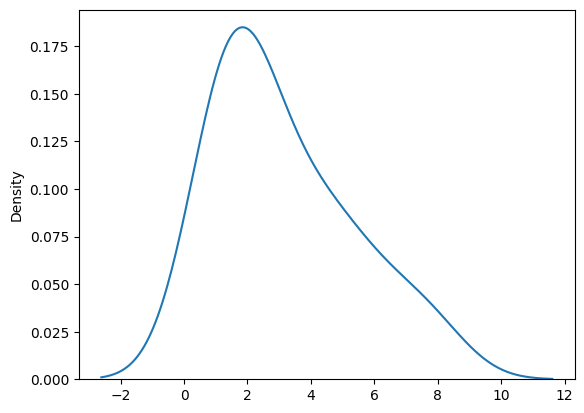

In [57]:
sns.kdeplot(x)

In [58]:
skew(x)

0.8351106017103913

In [61]:
pd.Series(x).mode()[0], np.median(x), x.mean()

(1, 2.0, 3.1578947368421053)

In [62]:
x1 = np.array([1,2,3,4,5,5,6,6,7,7,8,8,8,8,8,8,8])

<Axes: ylabel='Density'>

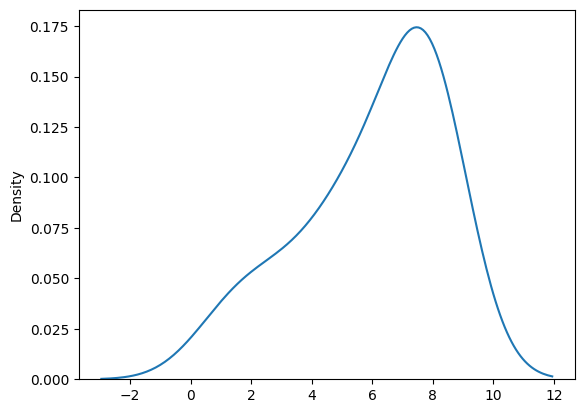

In [63]:
sns.kdeplot(x1)

In [64]:
skew(x1)

-0.8685324828132145

In [66]:
pd.Series(x1).mode()[0], np.median(x1), x1.mean()

(8, 7.0, 6.0)

In [67]:
xs = np.array([1,2,2,3,3,3,4,4,4,4,5,5,5,5,5,5,6,6,6,6,7,7,7,8,8,9])

In [68]:
skew(xs)

0.0

##### Kurtosis

In [70]:
xs

array([1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7,
       7, 8, 8, 9])

In [71]:
from scipy.stats import kurtosis

In [72]:
kurtosis(xs)

-0.556

In [74]:
xk = np.array([0,10,10,20])

In [76]:
kurtosis(xk)

-1.0

<Axes: ylabel='Density'>

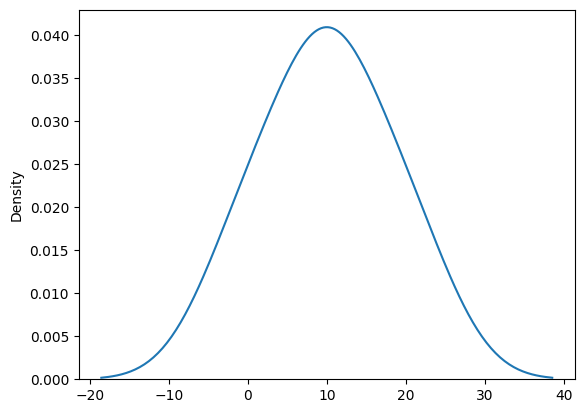

In [77]:
sns.kdeplot(xk)

#### Outliers

##### Boxplot

In [81]:
np.random.randint(10,20)

17

In [82]:
s = []
for i in range(100):
    s.append(np.random.randint(10000,20000))

In [84]:
df = pd.DataFrame({'salary': s})

In [85]:
df

,salary
0,18302
1,18955
2,14663
3,15177
4,12503
...,...
95,16350
96,14821
97,13914
98,15709


In [86]:
df.iloc[23,:]

salary    12862
Name: 23, dtype: int64

In [87]:
df.iloc[23,:] = 27000
df.iloc[81,:] = 31000

<Axes: >

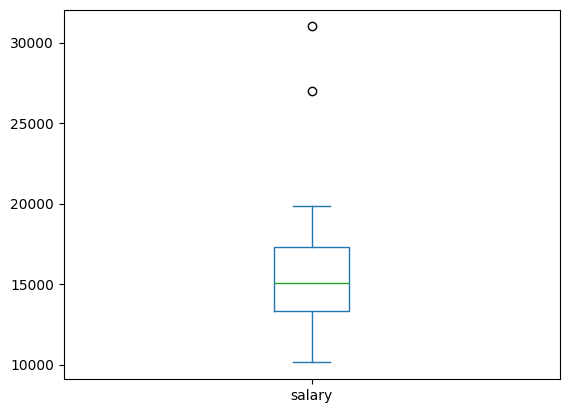

In [88]:
df.plot.box()

<Axes: >

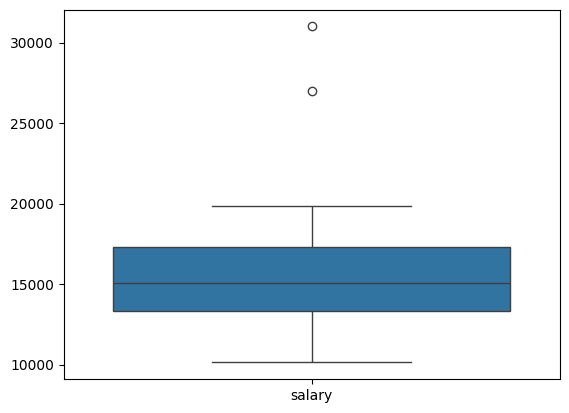

In [89]:
sns.boxplot(df)

<Axes: ylabel='Frequency'>

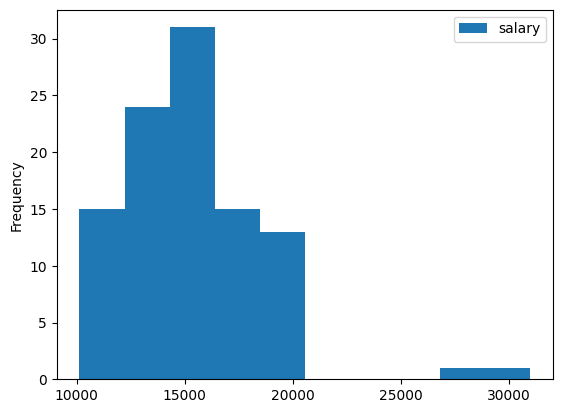

In [90]:
df.plot.hist()

In [91]:
df.shape

(100, 1)

In [94]:
df_new = df[df['salary'] < 25000]

In [96]:
df_new.shape

(98, 1)

<Axes: >

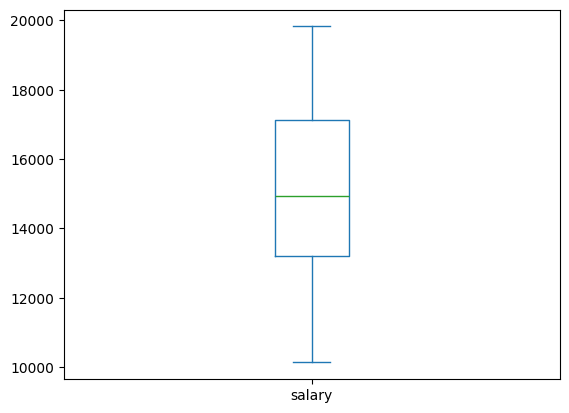

In [97]:
df_new.plot.box()

##### Z-scores

In [99]:
s = []
for i in range(100):
    s.append(np.random.randint(10000,20000))

In [100]:
df = pd.DataFrame({'salary': s})

In [101]:
df

,salary
0,19504
1,13859
2,18173
3,14739
4,11794
...,...
95,14992
96,17575
97,13903
98,11017


In [102]:
def zscore(n):
    z = (n - n.mean()) / n.std()
    return z

In [103]:
zscore(df)

,salary
0,1.612978
1,-0.314726
2,1.158456
3,-0.014216
4,-1.019901
...,...
95,0.072180
96,0.954246
97,-0.299701
98,-1.285237


In [105]:
zscore(df).min(), zscore(df).max()

(salary   -1.591553
 dtype: float64,
 salary    1.683666
 dtype: float64)

In [106]:
df.iloc[23,:] = 27000
df.iloc[81,:] = 31000

In [109]:
x = zscore(df)

In [110]:
x.iloc[23,:]

salary    3.383715
Name: 23, dtype: float64

In [111]:
x.iloc[81,:]

salary    4.512968
Name: 81, dtype: float64

In [119]:
newdf = df[ x['salary'] < 3]

In [120]:
newdf.shape

(98, 1)

##### Turkey's Fences

In [126]:
np.percentile(df['salary'], 50)

14515.5

In [127]:
Q1 = np.percentile(df['salary'], 25)
Q3 = np.percentile(df['salary'], 75)

In [129]:
Q1, Q3

(12372.5, 17579.0)

In [130]:
df.describe()

,salary
count,100.000000
mean,15014.320000
std,3542.165659
min,10120.000000
25%,12372.500000
50%,14515.500000
75%,17579.000000
max,31000.000000


In [131]:
IQR = Q3 - Q1
IQR

5206.5

In [133]:
upper_fence = Q3 + 1.5 * IQR
lower_fence = Q1 - 1.5 * IQR

In [134]:
upper_fence, lower_fence

(25388.75, 4562.75)

In [135]:
df.shape

(100, 1)

In [136]:
newdf = df[(df['salary'] > lower_fence) & (df['salary'] < upper_fence)]

In [137]:
newdf.shape

(98, 1)